In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil
import pandas as pd
#math operations
import numpy as np

In [ ]:
df =pd.read_csv('/content/drive/MyDrive/Skin_Cancer/ISIC_2019_Training_GroundTruth.csv')

In [ ]:
df.head(5)

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
import os
import shutil
import numpy as np

def create_train_test_dirs(base_dir, class_names):
    for class_name in class_names:
        os.makedirs(os.path.join(base_dir, 'train', class_name), exist_ok=True)
        os.makedirs(os.path.join(base_dir, 'test', class_name), exist_ok=True)

def split_data(source_dir, train_dir, test_dir, test_size=0.2):
    files = [file for file in os.listdir(source_dir) if os.path.isfile(os.path.join(source_dir, file))]
    np.random.shuffle(files)
    split_index = int(len(files) * (1 - test_size))
    train_files = files[:split_index]
    test_files = files[split_index:]

    for file in train_files:
        shutil.copy(os.path.join(source_dir, file), os.path.join(train_dir, file))

    for file in test_files:
        shutil.copy(os.path.join(source_dir, file), os.path.join(test_dir, file))

# Define directories
base_dir = "/content/drive/MyDrive/Skin_Cancer/ISIC_2019_Training_Input"
class_names = ["Basal_cell_carcinoma", "Melanoma", "Nevus"]

# Create train and test directories
create_train_test_dirs(base_dir, class_names)

# Split and copy the images
for class_name in class_names:
    source_dir = os.path.join(base_dir, class_name)
    train_dir = os.path.join(base_dir, 'train', class_name)
    test_dir = os.path.join(base_dir, 'test', class_name)

    split_data(source_dir, train_dir, test_dir, test_size=0.2)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image dimensions
img_width, img_height = 224, 224  # You can adjust these dimensions based on your requirements

# Set up training data generator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    rotation_range=40,  # Randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # Randomly translate images horizontally
    height_shift_range=0.2,  # Randomly translate images vertically
    shear_range=0.2,  # Randomly apply shearing transformations
    zoom_range=0.2,  # Randomly zooming inside pictures
    horizontal_flip=True,  # Randomly flip images
    fill_mode='nearest'  # Strategy used for filling in newly created pixels
)

# Set up testing data generator (no augmentation, just rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

# Training data generator
train_generator = train_datagen.flow_from_directory(
    os.path.join(base_dir, 'train'),  # This is the target directory
    target_size=(img_width, img_height),  # All images will be resized to this size
    batch_size=32,
    class_mode='categorical'  # Since we use categorical_crossentropy loss, we need categorical labels
)

# Validation data generator
validation_generator = test_datagen.flow_from_directory(
    os.path.join(base_dir, 'test'),
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical'
)

In [ ]:
!git clone https://github.com/HRNet/HRNet-Image-Classification.git

%cd HRNet-Image-Classification
!pip install -r requirements.txt



Cloning into 'HRNet-Image-Classification'...
remote: Enumerating objects: 169, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 169 (delta 52), reused 41 (delta 41), pack-reused 104
Receiving objects: 100% (169/169), 186.75 KiB | 2.20 MiB/s, done.
Resolving deltas: 100% (94/94), done.
/content/HRNet-Image-Classification
  Preparing metadata (setup.py) ... done
ERROR: Could not find a version that satisfies the requirement opencv-python==3.4.1.15 (from versions: 3.4.0.14, 3.4.10.37, 3.4.11.39, 3.4.11.41, 3.4.11.43, 3.4.11.45, 3.4.13.47, 3.4.15.55, 3.4.16.57, 3.4.16.59, 3.4.17.61, 3.4.17.63, 3.4.18.65, 4.3.0.38, 4.4.0.40, 4.4.0.42, 4.4.0.44, 4.4.0.46, 4.5.1.48, 4.5.3.56, 4.5.4.58, 4.5.4.60, 4.5.5.62, 4.5.5.64, 4.6.0.66, 4.7.0.68, 4.7.0.72, 4.8.0.74, 4.8.0.76, 4.8.1.78)
ERROR: No matching distribution found for opencv-python==3.4.1.15


In [ ]:
requirements_path = '/content/HRNet-Image-Classification/requirements.txt'
with open(requirements_path, 'r') as file:
    requirements = file.readlines()

# Edit the opencv-python version
for i, line in enumerate(requirements):
    if 'opencv-python' in line:
        requirements[i] = 'opencv-python==4.8.1.78\n'

with open(requirements_path, 'w') as file:
    file.writelines(requirements)


In [ ]:
!pip install -r /content/HRNet-Image-Classification/requirements.txt
!pip install fastapi kaleido python-multipart uvicorn

  Using cached easydict-1.7.tar.gz (6.2 kB)
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.2/224.2 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 824.6 kB/s eta 0:00:00
  Created wheel for EasyDict: filename=easydict-1.7-py3-none-any.whl size=6105 sha256=e7b97e07ce6481583e6c614e50c4394b97edcd59511a0ee4ca94a052130b7c60
  Stored in directory: /root/.cache/pip/wheels/ce/67/6e/cbc2379c9b1cd9d7d7068eba7d8f5d5befcc82e5f691883c15
  Created wheel for shapely: filename=Shapely-1.6.4-py2.py3-none-any.whl size=155974 sha256=5fdb48e1c4da0aadcbb9e4d41c7d8be132251bd2044160a7725844a81b11ab4c
  Stored in directory: /root/.cache/pip/wheels/f1/af/7b/8044ec1dd8739ae58dca23bca4f1eaca5eaff74dd4c41fd9cd
Successfully built EasyDict shapely
  Attempting uninstall: shapely
    Found existing installation: shape

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 956.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 9.0 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-probability 0.22.0 requires typing-extensions<4.6.0, but you have typing-extensions 4.8.0 which is incompatible.


In [ ]:
!pip install typing-extensions==4.5.0


  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.8.0
    Uninstalling typing_extensions-4.8.0:
      Successfully uninstalled typing_extensions-4.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastapi 0.104.1 requires typing-extensions>=4.8.0, but you have typing-extensions 4.5.0 which is incompatible.


In [ ]:
!pip check
!pip install jedi
!pip install cohere openai tiktoken
!apt-get install libcairo2-dev
!pip install pycairo



ipython 7.34.0 requires jedi, which is not installed.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires openai, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.
pygobject 3.42.1 requires pycairo, which is not installed.
fastapi 0.104.1 has requirement typing-extensions>=4.8.0, but you have typing-extensions 4.5.0.
geopandas 0.13.2 has requirement shapely>=1.7.1, but you have shapely 1.6.4.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.4/221.4 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 10.3 MB/s 

In [ ]:
!pip install jedi cohere openai tiktoken
!pip check


fastapi 0.104.1 has requirement typing-extensions>=4.8.0, but you have typing-extensions 4.5.0.
geopandas 0.13.2 has requirement shapely>=1.7.1, but you have shapely 1.6.4.


In [ ]:
!pip install --upgrade typing-extensions


  Using cached typing_extensions-4.8.0-py3-none-any.whl (31 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-probability 0.22.0 requires typing-extensions<4.6.0, but you have typing-extensions 4.8.0 which is incompatible.


In [ ]:
!pip uninstall fastapi -y


Found existing installation: fastapi 0.104.1
Uninstalling fastapi-0.104.1:
  Successfully uninstalled fastapi-0.104.1


In [ ]:
!pip install --upgrade shapely


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 11.2 MB/s eta 0:00:00
  Attempting uninstall: shapely
    Found existing installation: Shapely 1.6.4
    Uninstalling Shapely-1.6.4:
      Successfully uninstalled Shapely-1.6.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.


In [ ]:
!pwd

/content/HRNet-Image-Classification


In [ ]:
!pip list
!ls
!ls lib
!ls lib/models

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.1
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.3.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.5.0
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.0
attrs                            23.1.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.13.1
backcall                         0.2.0
backoff                          2.2.1
beautifulsoup4                   4.11.2
bi

In [ ]:
import sys


In [ ]:
sys.path.append('/content/HRNet-Image-Classification/lib')


In [ ]:
!cat /content/HRNet-Image-Classification/lib/models/cls_hrnet.py


# ------------------------------------------------------------------------------
# Copyright (c) Microsoft
# Licensed under the MIT License.
# Written by Bin Xiao (Bin.Xiao@microsoft.com)
# Modified by Ke Sun (sunk@mail.ustc.edu.cn)
# ------------------------------------------------------------------------------

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import logging
import functools

import numpy as np

import torch
import torch.nn as nn
import torch._utils
import torch.nn.functional as F

BN_MOMENTUM = 0.1
logger = logging.getLogger(__name__)


def conv3x3(in_planes, out_planes, stride=1):
    """3x3 convolution with padding"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride,
                     padding=1, bias=False)


class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super(BasicBlock, self).__init__()
  

In [ ]:
from models.cls_hrnet import HighResolutionNet, get_cls_net


In [ ]:
!ls /content/HRNet-Image-Classification/experiments

cls_hrnet_w18_sgd_lr5e-2_wd1e-4_bs32_x100.yaml
cls_hrnet_w18_small_v1_sgd_lr5e-2_wd1e-4_bs32_x100.yaml
cls_hrnet_w18_small_v2_sgd_lr5e-2_wd1e-4_bs32_x100.yaml
cls_hrnet_w30_sgd_lr5e-2_wd1e-4_bs32_x100.yaml
cls_hrnet_w32_sgd_lr5e-2_wd1e-4_bs32_x100.yaml
cls_hrnet_w40_sgd_lr5e-2_wd1e-4_bs32_x100.yaml
cls_hrnet_w44_sgd_lr5e-2_wd1e-4_bs32_x100.yaml
cls_hrnet_w48_sgd_lr5e-2_wd1e-4_bs32_x100.yaml
cls_hrnet_w64_sgd_lr5e-2_wd1e-4_bs32_x100.yaml


In [ ]:
import yaml
from models.cls_hrnet import get_cls_net

# Load the configuration
config_file = '/content/HRNet-Image-Classification/experiments/cls_hrnet_w18_small_v2_sgd_lr5e-2_wd1e-4_bs32_x100.yaml'  # Adjust the file name as needed
with open(config_file, 'r') as file:
    config = yaml.safe_load(file)

# Initialize the HRNet model
model = get_cls_net(config)  # Only one variable is needed here

# Continue with the rest of your setup...



In [ ]:
import torch.optim as optim
import torch.nn as nn

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)  # You can adjust the learning rate


In [ ]:
from torchvision import datasets
from torch.utils.data import DataLoader

# Assuming no additional transforms are needed as the data is preprocessed
train_dataset = datasets.ImageFolder('/content/drive/MyDrive/Skin_Cancer/ISIC_2019_Training_Input/train')
val_dataset = datasets.ImageFolder('/content/drive/MyDrive/Skin_Cancer/ISIC_2019_Training_Input/test')

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)




In [ ]:
model = get_cls_net(config)


In [ ]:
# Loss function
criterion = nn.CrossEntropyLoss()

# Optimizer (You can adjust the learning rate and other hyperparameters as needed)
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define a simple transformation that only converts the images to PyTorch tensors
transform = transforms.Compose([
    transforms.ToTensor(),  # Converts PIL images to PyTorch tensors
])

# Apply this transformation to your datasets
train_dataset = datasets.ImageFolder('/content/drive/MyDrive/Skin_Cancer/ISIC_2019_Training_Input/train', transform=transform)
val_dataset = datasets.ImageFolder('/content/drive/MyDrive/Skin_Cancer/ISIC_2019_Training_Input/test', transform=transform)

# Create the data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)


In [ ]:
from torchvision import transforms

# Update the transform to include resizing
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to the size expected by your model
    transforms.ToTensor()
])

# Update your datasets with the new transform
train_dataset = datasets.ImageFolder('/content/drive/MyDrive/Skin_Cancer/ISIC_2019_Training_Input/train', transform=transform)
val_dataset = datasets.ImageFolder('/content/drive/MyDrive/Skin_Cancer/ISIC_2019_Training_Input/test', transform=transform)

# Data loaders remain the same
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)


In [ ]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model.to(device)  # Move your model to the GPU

num_epochs = 10  # Number of epochs
train_accuracies = []
val_accuracies = []


for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)  # Move inputs and labels to GPU

        optimizer.zero_grad()  # Zero the parameter gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Optimize the model

        running_loss += loss.item()

        # Get predictions from the maximum value
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_accuracy = 100 * correct_train / total_train
    train_accuracies.append(train_accuracy)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {running_loss / len(train_loader)}, Training Accuracy: {train_accuracy}%')

    # Validation step
    model.eval()  # Set the model to evaluation mode
    val_loss = 0.0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_accuracy = 100 * correct_val / total_val
    val_accuracies.append(val_accuracy)
    print(f'Validation Loss: {val_loss / len(val_loader)}, Validation Accuracy: {val_accuracy}%')


Epoch 1/10, Loss: 0.7325213676826521, Training Accuracy: 83.35734870317003%
Validation Loss: 0.5212109317866768, Validation Accuracy: 79.57317073170732%
Epoch 2/10, Loss: 0.28256226601925766, Training Accuracy: 89.4092219020173%
Validation Loss: 0.3009190859454798, Validation Accuracy: 89.86280487804878%
Epoch 3/10, Loss: 0.26410823772576725, Training Accuracy: 89.76945244956772%
Validation Loss: 0.3454363845833918, Validation Accuracy: 90.77743902439025%
Epoch 4/10, Loss: 0.2577214130962437, Training Accuracy: 90.70605187319885%
Validation Loss: 0.22188588059166583, Validation Accuracy: 91.61585365853658%
Epoch 5/10, Loss: 0.235341597517783, Training Accuracy: 90.92219020172911%
Validation Loss: 0.19283849373459816, Validation Accuracy: 93.0640243902439%
Epoch 6/10, Loss: 0.23774003931744533, Training Accuracy: 90.4178674351585%
Validation Loss: 0.4873734127457549, Validation Accuracy: 83.15548780487805%
Epoch 7/10, Loss: 0.19524661172181368, Training Accuracy: 92.57925072046109%
Vali

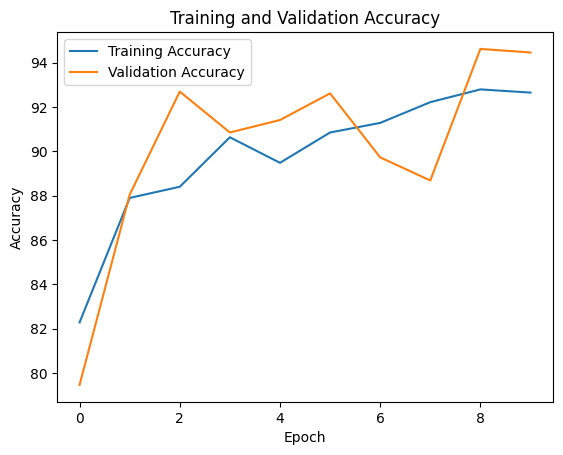

In [ ]:
import matplotlib.pyplot as plt

# Plotting the training and validation accuracy over epochs
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


**MobileNet V2**

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load MobileNetV2 pre-trained on ImageNet without the top classification layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the MobileNetV2 layers
base_model.trainable = False

# Create a new model on top of MobileNetV2
model = Sequential([
    base_model,  # Use MobileNetV2 as a feature extractor
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),  # Add additional dense layers if needed
    Dense(len(class_names), activation='softmax')  # Output layer with softmax activation
])

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,  # You can adjust the number of epochs
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(validation_generator)
print(f'MobileNetV2 Model Accuracy: {test_accuracy * 100:.2f}%')

# Predict on test data
predictions = model.predict(validation_generator)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = validation_generator.classes





9406464/9406464 [==============================] - 0s 0us/step
Epoch 1/10
44/44 [==============================] - 50s 1s/step - loss: 0.5030 - accuracy: 0.8465 - val_loss: 0.2370 - val_accuracy: 0.9169
Epoch 2/10
44/44 [==============================] - 52s 1s/step - loss: 0.2499 - accuracy: 0.9150 - val_loss: 0.1932 - val_accuracy: 0.9322
Epoch 3/10
44/44 [==============================] - 45s 1s/step - loss: 0.1987 - accuracy: 0.9352 - val_loss: 0.1509 - val_accuracy: 0.9527
Epoch 4/10
44/44 [==============================] - 44s 1s/step - loss: 0.1758 - accuracy: 0.9359 - val_loss: 0.1448 - val_accuracy: 0.9550
Epoch 5/10
44/44 [==============================] - 45s 1s/step - loss: 0.1539 - accuracy: 0.9402 - val_loss: 0.1219 - val_accuracy: 0.9543
Epoch 6/10
44/44 [==============================] - 44s 1s/step - loss: 0.1456 - accuracy: 0.9488 - val_loss: 0.1305 - val_accuracy: 0.9596
Epoch 7/10
44/44 [==============================] - 43s 971ms/step - loss: 0.1346 - accuracy: 0.9

In [ ]:
# Save the entire model to a file
model.save('saved_mobilenet_model.h5')
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('saved_mobilenet_model.h5')

# Now you can use loaded_model for predictions or further training
# Save the entire model to Google Drive
model.save('/content/drive/My Drive/saved_mobilenet_model.h5')



Prediction

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from PIL import Image
from tensorflow.keras.models import load_model

# Define the image size used during training
img_width, img_height = 224, 224

# Class names used during training
class_names = ['Basal Cell Carcinoma','Melanoma', 'Nevus']

# Load the trained model
model = load_model('/content/drive/MyDrive/saved_mobilenet_model.h5')

def preprocess_image(image, target_size):
    if image.mode != "RGB":
        image = image.convert("RGB")
    image = image.resize(target_size)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image /= 255.0
    return image

def predict_image(image_path):
    image = Image.open(image_path)
    processed_image = preprocess_image(image, target_size=(img_width, img_height))
    prediction = model.predict(processed_image)
    predicted_class_index = np.argmax(prediction, axis=1)[0]
    predicted_class = class_names[predicted_class_index]
    return predicted_class

# Function to upload and test an image
def upload_and_predict():
    print("Upload an image for prediction...")

    # Simulating an image upload. Replace with actual file upload code as needed.
    uploaded_file = input("Enter the path of the image: ")

    try:
        predicted_class = predict_image(uploaded_file)
        return predicted_class
    except Exception as e:
        print(f"Error occurred: {e}")
        return None

# Test the function
predicted_class = upload_and_predict()
if predicted_class is not None:
    print(f"Predicted class: {predicted_class}")
else:
    print("Prediction failed.")

Upload an image for prediction...
Enter the path of the image: /content/drive/MyDrive/Skin_Cancer/TestData/Melanoma/melanoma_ISIC_0057747.jpg
1/1 [==============================] - 1s 1s/step
Predicted class: Melanoma


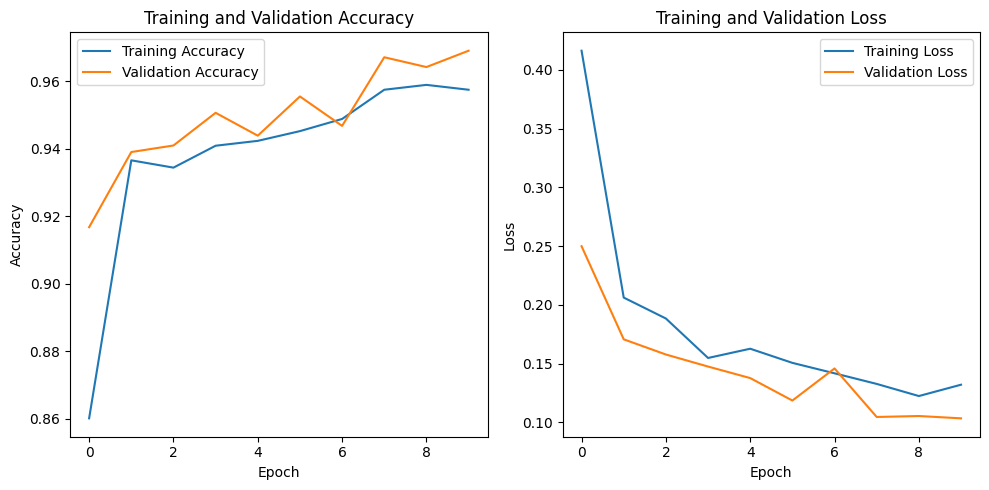

In [ ]:
# Plotting the training and validation accuracy
plt.figure(figsize=(10, 5))

# Plotting accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()




GoogleNet


In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load InceptionV3 pre-trained on ImageNet without the top classification layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the InceptionV3 layers
base_model.trainable = False

# Create a new model on top of InceptionV3
model = Sequential([
    base_model,  # Use InceptionV3 as a feature extractor
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),  # Add additional dense layers if needed
    Dense(len(class_names), activation='softmax')  # Output layer with softmax activation
])

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,  # You can adjust the number of epochs
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(validation_generator)
print(f'GoogleNet (InceptionV3) Model Accuracy: {test_accuracy * 100:.2f}%')

# Predict on test data
predictions = model.predict(validation_generator)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = validation_generator.classes






87910968/87910968 [==============================] - 0s 0us/step
Epoch 1/10
44/44 [==============================] - 61s 1s/step - loss: 0.6130 - accuracy: 0.8336 - val_loss: 0.3154 - val_accuracy: 0.8887
Epoch 2/10
44/44 [==============================] - 46s 1s/step - loss: 0.2687 - accuracy: 0.9013 - val_loss: 0.2771 - val_accuracy: 0.9108
Epoch 3/10
44/44 [==============================] - 46s 1s/step - loss: 0.2580 - accuracy: 0.9020 - val_loss: 0.2165 - val_accuracy: 0.9284
Epoch 4/10
44/44 [==============================] - 48s 1s/step - loss: 0.2152 - accuracy: 0.9258 - val_loss: 0.2034 - val_accuracy: 0.9306
Epoch 5/10
44/44 [==============================] - 46s 1s/step - loss: 0.2216 - accuracy: 0.9251 - val_loss: 0.1864 - val_accuracy: 0.9375
Epoch 6/10
44/44 [==============================] - 45s 1s/step - loss: 0.1850 - accuracy: 0.9380 - val_loss: 0.1600 - val_accuracy: 0.9497
Epoch 7/10
44/44 [==============================] - 44s 1000ms/step - loss: 0.1760 - accuracy: 

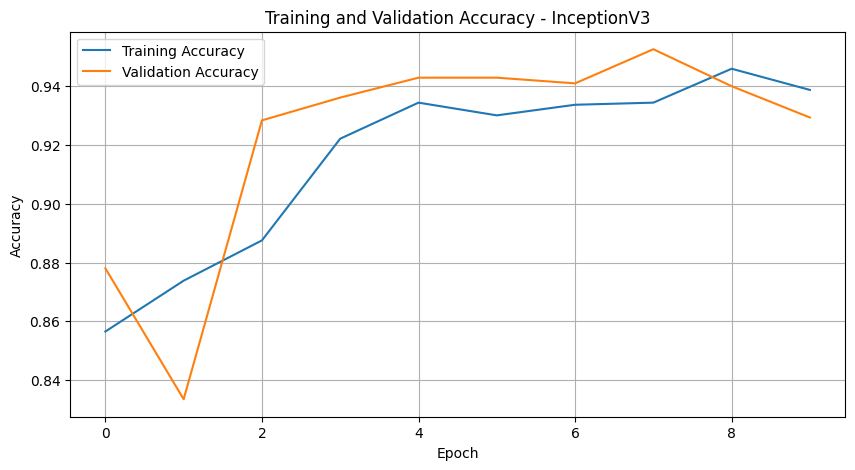

In [ ]:
# Plotting the training and validation accuracy for InceptionV3 model
plt.figure(figsize=(10, 5))

# Plotting accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy - InceptionV3')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


**ALEXNET**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Define the AlexNet-like architecture
model = Sequential([
    Conv2D(96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    Conv2D(256, kernel_size=(5,5), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    Conv2D(384, kernel_size=(3,3), padding='same', activation='relu'),
    Conv2D(384, kernel_size=(3,3), padding='same', activation='relu'),
    Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(len(class_names), activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20,  # You can adjust the number of epochs
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(validation_generator)
print(f'AlexNet-like Model Accuracy: {test_accuracy * 100:.2f}%')

# Predict on test data
predictions = model.predict(validation_generator)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = validation_generator.classes





Epoch 1/20
44/44 [==============================] - 56s 1s/step - loss: 1.2085 - accuracy: 0.7997 - val_loss: 0.5609 - val_accuracy: 0.8140
Epoch 2/20
44/44 [==============================] - 44s 1s/step - loss: 0.5036 - accuracy: 0.8062 - val_loss: 0.4193 - val_accuracy: 0.8140
Epoch 3/20
44/44 [==============================] - 42s 956ms/step - loss: 0.5298 - accuracy: 0.8235 - val_loss: 0.4584 - val_accuracy: 0.8209
Epoch 4/20
44/44 [==============================] - 44s 1s/step - loss: 0.4025 - accuracy: 0.8408 - val_loss: 0.3782 - val_accuracy: 0.8483
Epoch 5/20
44/44 [==============================] - 54s 1s/step - loss: 0.4037 - accuracy: 0.8545 - val_loss: 0.3676 - val_accuracy: 0.8537
Epoch 6/20
44/44 [==============================] - 44s 1s/step - loss: 0.6508 - accuracy: 0.8084 - val_loss: 0.5826 - val_accuracy: 0.8140
Epoch 7/20
44/44 [==============================] - 43s 987ms/step - loss: 0.5953 - accuracy: 0.8120 - val_loss: 0.5831 - val_accuracy: 0.8140
Epoch 8/20
44/

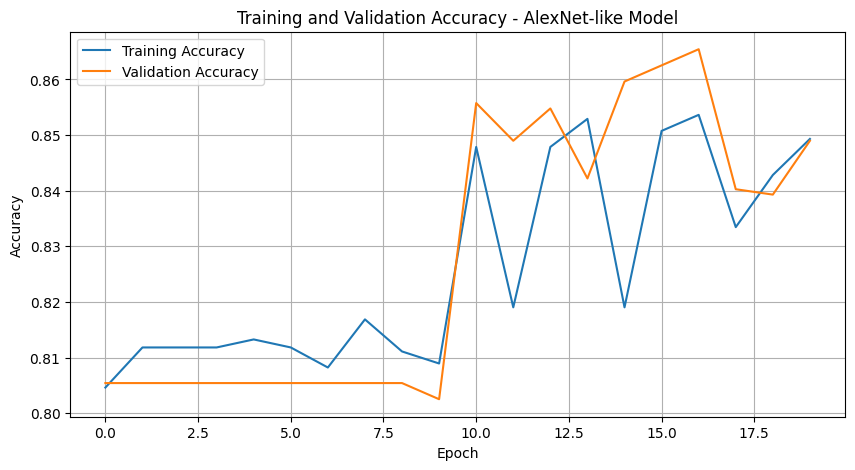

In [ ]:
# Plotting the training and validation accuracy for the AlexNet-like model
plt.figure(figsize=(10, 5))

# Plotting accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy - AlexNet-like Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


**VGG16**

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Load VGG16 pre-trained on ImageNet without the top classification layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the VGG16 layers
base_model.trainable = False

# Create a new model on top of VGG16
model = Sequential([
    base_model,  # Use VGG16 as a feature extractor
    Flatten(),
    Dense(128, activation='relu'),  # Add additional dense layers if needed
    Dense(len(class_names), activation='softmax')  # Output layer with softmax activation
])

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,  # You can adjust the number of epochs
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(validation_generator)
print(f'VGG16 Model Accuracy: {test_accuracy * 100:.2f}%')

# Predict on test data
predictions = model.predict(validation_generator)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = validation_generator.classes




58889256/58889256 [==============================] - 4s 0us/step
Epoch 1/10
44/44 [==============================] - 717s 16s/step - loss: 1.1010 - accuracy: 0.8019 - val_loss: 0.3339 - val_accuracy: 0.8920
Epoch 2/10
44/44 [==============================] - 49s 1s/step - loss: 0.2735 - accuracy: 0.9121 - val_loss: 0.1785 - val_accuracy: 0.9328
Epoch 3/10
44/44 [==============================] - 56s 1s/step - loss: 0.2929 - accuracy: 0.8963 - val_loss: 0.1662 - val_accuracy: 0.9428
Epoch 4/10
44/44 [==============================] - 49s 1s/step - loss: 0.1900 - accuracy: 0.9258 - val_loss: 0.2121 - val_accuracy: 0.9165
Epoch 5/10
44/44 [==============================] - 47s 1s/step - loss: 0.2024 - accuracy: 0.9229 - val_loss: 0.1577 - val_accuracy: 0.9465
Epoch 6/10
44/44 [==============================] - 47s 1s/step - loss: 0.2055 - accuracy: 0.9316 - val_loss: 0.1762 - val_accuracy: 0.9328
Epoch 7/10
44/44 [==============================] - 46s 1s/step - loss: 0.1840 - accuracy: 0.

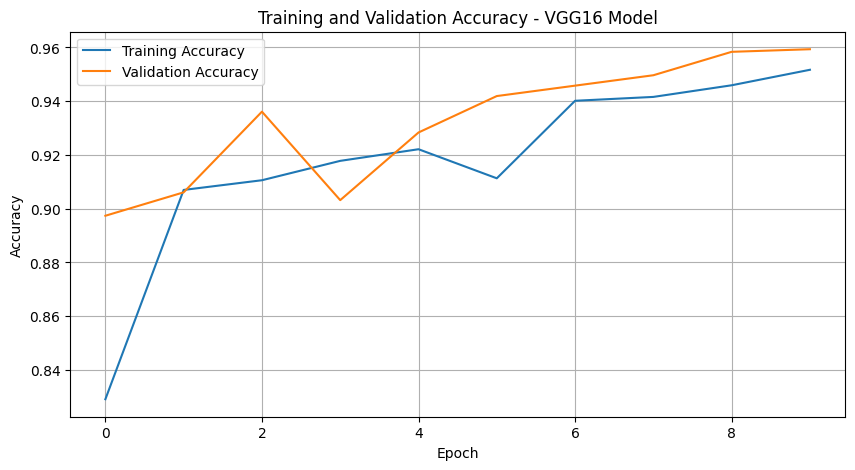

In [ ]:
# Plotting the training and validation accuracy for the VGG16 model
plt.figure(figsize=(10, 5))

# Plotting accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy - VGG16 Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
